# Import Libraries


In [1]:
import os
import PIL
import shutil
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from shutil import copyfile
from tensorflow import keras
from keras.preprocessing import image
from IPython.display import display, Image
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input

# Download Dataset and Unzip

In [2]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 2.84G/2.84G [02:11<00:00, 23.9MB/s]
100% 2.84G/2.84G [02:11<00:00, 23.3MB/s]


In [3]:
!unzip fresh-and-stale-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_5372.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_54.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6186.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6285.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6551.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6565.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6985.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7306.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp 

# Data Preparation

In [4]:
dtrain_dir = './dataset/Train'

fapple_train_dir = os.path.join(dtrain_dir, 'freshapples')
fbanana_train_dir = os.path.join(dtrain_dir,'freshbanana')
fbittergroud_train_dir = os.path.join(dtrain_dir,'freshbittergroud')
fcapsicum_train_dir = os.path.join(dtrain_dir,'freshcapsicum')
fcucumber_train_dir = os.path.join(dtrain_dir, 'freshcucumber')
fokra_train_dir = os.path.join(dtrain_dir,'freshokra')
forange_train_dir = os.path.join(dtrain_dir,'freshoranges')
fpotato_train_dir = os.path.join(dtrain_dir,'freshpotato')
ftomato_train_dir = os.path.join(dtrain_dir,'freshtomato')

rapple_train_dir = os.path.join(dtrain_dir,'rottenapples')
rbanana_train_dir = os.path.join(dtrain_dir,'rottenbanana')
rbittergroud_train_dir = os.path.join(dtrain_dir,'rottenbittergroud')
rcapsicum_train_dir = os.path.join(dtrain_dir,'rottencapsicum')
rcucumber_train_dir = os.path.join(dtrain_dir,'rottencucumber')
rokra_train_dir = os.path.join(dtrain_dir, 'rottenokra')
rorange_train_dir = os.path.join(dtrain_dir,'rottenoranges')
rpotato_train_dir = os.path.join(dtrain_dir, 'rottenpotato')
rtomato_train_dir = os.path.join(dtrain_dir,'rottentomato')

print('fresh apple train       = ', len(os.listdir(fapple_train_dir)))
print('fresh banana train      = ', len(os.listdir(fbanana_train_dir)))
print('fresh bittergroud train = ', len(os.listdir(fbittergroud_train_dir)))
print('fresh capsicum train    = ', len(os.listdir(fcapsicum_train_dir)))
print('fresh cucumber train    = ', len(os.listdir(fcucumber_train_dir)))
print('fresh okra train        = ', len(os.listdir(fokra_train_dir)))
print('fresh orange train      = ', len(os.listdir(forange_train_dir)))
print('fresh potato train      = ', len(os.listdir(fpotato_train_dir)))
print('fresh tomato train      = ', len(os.listdir(ftomato_train_dir)), '\n')

print('rotten apple train       = ', len(os.listdir(rapple_train_dir)))
print('rotten banana train      = ', len(os.listdir(rbanana_train_dir)))
print('rotten bittergroud train = ', len(os.listdir(rbittergroud_train_dir)))
print('rotten capsicum train    = ', len(os.listdir(rcapsicum_train_dir)))
print('rotten cucumber train    = ', len(os.listdir(rcucumber_train_dir)))
print('rotten okra train        = ', len(os.listdir(rokra_train_dir)))
print('rotten orange train      = ', len(os.listdir(rorange_train_dir)))
print('rotten potato train      = ', len(os.listdir(rpotato_train_dir)))
print('rotten tomato train      = ', len(os.listdir(rtomato_train_dir)))

fresh apple train       =  2424
fresh banana train      =  2468
fresh bittergroud train =  327
fresh capsicum train    =  990
fresh cucumber train    =  496
fresh okra train        =  635
fresh orange train      =  1466
fresh potato train      =  536
fresh tomato train      =  1858 

rotten apple train       =  3248
rotten banana train      =  2932
rotten bittergroud train =  357
rotten capsicum train    =  901
rotten cucumber train    =  421
rotten okra train        =  338
rotten orange train      =  1595
rotten potato train      =  802
rotten tomato train      =  1825


In [5]:
dtest_dir = './dataset/Test'

fapple_test_dir = os.path.join(dtest_dir, 'freshapples')
fbanana_test_dir = os.path.join(dtest_dir,'freshbanana')
fcucumber_test_dir = os.path.join(dtest_dir, 'freshcucumber')
fokra_test_dir = os.path.join(dtest_dir,'freshokra')
forange_test_dir = os.path.join(dtest_dir,'freshoranges')
fpotato_test_dir = os.path.join(dtest_dir,'freshpatato')
ftomato_test_dir = os.path.join(dtest_dir,'freshtamto')

rapple_test_dir = os.path.join(dtest_dir,'rottenapples')
rbanana_test_dir = os.path.join(dtest_dir,'rottenbanana')
rcucumber_test_dir = os.path.join(dtest_dir,'rottencucumber')
rokra_test_dir = os.path.join(dtest_dir, 'rottenokra')
rorange_test_dir = os.path.join(dtest_dir,'rottenoranges')
rpotato_test_dir = os.path.join(dtest_dir, 'rottenpatato')
rtomato_test_dir = os.path.join(dtest_dir,'rottentamto')

print('fresh apple test     = ', len(os.listdir(fapple_test_dir)))
print('fresh banana test    = ', len(os.listdir(fbanana_test_dir)))
print('fresh cucumber test  = ', len(os.listdir(fcucumber_test_dir)))
print('fresh okra test      = ', len(os.listdir(fokra_test_dir)))
print('fresh orange test    = ', len(os.listdir(forange_test_dir)))
print('fresh potato test    = ', len(os.listdir(fpotato_test_dir)))
print('fresh tomato test    = ', len(os.listdir(ftomato_test_dir)), '\n')

print('rotten apple test    = ', len(os.listdir(rapple_test_dir)))
print('rotten banana test   = ', len(os.listdir(rbanana_test_dir)))
print('rotten cucumber test = ', len(os.listdir(rcucumber_test_dir)))
print('rotten okra test     = ', len(os.listdir(rokra_test_dir)))
print('rotten orange test   = ', len(os.listdir(rorange_test_dir)))
print('rotten potato test   = ', len(os.listdir(rpotato_test_dir)))
print('rotten tomato test   = ', len(os.listdir(rtomato_test_dir)))

fresh apple test     =  791
fresh banana test    =  892
fresh cucumber test  =  279
fresh okra test      =  370
fresh orange test    =  388
fresh potato test    =  270
fresh tomato test    =  255 

rotten apple test    =  988
rotten banana test   =  900
rotten cucumber test =  255
rotten okra test     =  224
rotten orange test   =  403
rotten potato test   =  370
rotten tomato test   =  353


# Merge and Split Dataset

In [6]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [7]:
try:

    base_dir = './'
    fruit_dir = make_dir(os.path.join(base_dir, 'fresee'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    val_dir = make_dir(os.path.join(fruit_dir, 'validation'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))

    train_fdir = make_dir(os.path.join(train_dir, 'Fresh'))
    train_rdir = make_dir(os.path.join(train_dir, 'Rotten'))

    val_fdir = make_dir(os.path.join(val_dir, 'Fresh'))
    val_rdir = make_dir(os.path.join(val_dir, 'Rotten'))

    test_fdir = make_dir(os.path.join(test_dir, 'Fresh'))
    test_rdir = make_dir(os.path.join(test_dir, 'Rotten'))

except OSError:
    pass

In [8]:
def split_dataset(src='', training='', validate='', split_size=0, seed=42):
    random.seed(seed)
    dataset = sorted(os.listdir(src))
    random_dataset = random.sample(dataset, len(dataset))

    train_size = int(len(dataset) * split_size)

    for k, filename in enumerate(random_dataset):
        filepath = os.path.join(src, filename)
        if os.path.getsize(filepath) > 0:
            if k < train_size:
                copyfile(filepath, os.path.join(training, filename))
            else:
                copyfile(filepath, os.path.join(validate, filename))

In [9]:
seed_value = 42
split_size = 0.8

# Fresh
split_dataset(fapple_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fbanana_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fbittergroud_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fcapsicum_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fcucumber_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fokra_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(forange_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fpotato_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(ftomato_train_dir, train_fdir, val_fdir, split_size, seed = seed_value)

# Rotten
split_dataset(rapple_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rbanana_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rbittergroud_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rcapsicum_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rcucumber_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rokra_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rorange_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rpotato_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rtomato_train_dir, train_rdir, val_rdir, split_size, seed = seed_value)


split_size = 0.1

# Fresh
split_dataset(fapple_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fbanana_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fcucumber_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fokra_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(forange_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(fpotato_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)
split_dataset(ftomato_test_dir, test_fdir, val_fdir, split_size, seed = seed_value)

# Rotten
split_dataset(rapple_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rbanana_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rcucumber_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rokra_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rorange_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rpotato_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)
split_dataset(rtomato_test_dir, test_rdir, val_rdir, split_size, seed = seed_value)

In [10]:
print(len(os.listdir('./fresee/train/Fresh')))
print(len(os.listdir('./fresee/train/Rotten')), '\n')

print(len(os.listdir('./fresee/validation/Fresh')))
print(len(os.listdir('./fresee/validation/Rotten')), '\n')

print(len(os.listdir('./fresee/test/Fresh')))
print(len(os.listdir('./fresee/test/Rotten')), '\n')


8956
9931 

4773
5290 

322
347 



# Data Preprocessing

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 20,
    vertical_flip = True,
    fill_mode = 'reflect',
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'binary',
    target_size = (160,160)
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    batch_size = 64,
    color_mode = 'rgb',
    class_mode = 'binary',
    target_size = (160,160)
)

Found 18887 images belonging to 2 classes.
Found 10063 images belonging to 2 classes.


# Build Model

In [13]:
pretrained_model = MobileNetV2(
    include_top = False,
    input_shape = (160, 160, 3),
    weights = 'imagenet',
)

for layer in pretrained_model.layers:
    layer.trainable = False

inputs = Input(shape = (160, 160, 3))

x = pretrained_model(inputs)

x = Flatten()(x)
x = Dense(512, activation='relu',)(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation = 'sigmoid')(x)

mobilenet_model = models.Model(inputs, outputs)

mobilenet_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,384,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,643,009 (71.12 MB)

 Trainable params: 16,385,025 (62.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
mobilenet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model Trained

In [15]:
history = mobilenet_model.fit(
  train_generator,
  epochs = 10,
  validation_data = val_generator,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 293s 933ms/step - accuracy: 0.8404 - loss: 1.3742 - val_accuracy: 0.9341 - val_loss: 0.1593
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 303s 900ms/step - accuracy: 0.9230 - loss: 0.1919 - val_accuracy: 0.9452 - val_loss: 0.1342
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 320s 892ms/step - accuracy: 0.9329 - loss: 0.1709 - val_accuracy: 0.9451 - val_loss: 0.1315
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 320s 887ms/step - accuracy: 0.9397 - loss: 0.1545 - val_accuracy: 0.9533 - val_loss: 0.1161
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.9448 - loss: 0.1371 - val_accuracy: 0.9540 - val_loss: 0.1123
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 268s 895ms/step - accuracy: 0.9500 - loss: 0.1287 - val_accuracy: 0.9564 - val_loss: 0.1130
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 321s 893ms/step - accuracy: 0.9509 - loss: 0.1272 - val_accuracy: 0.9583 - val_loss: 0.1041
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 318s 880ms/step - accuracy: 0.9506 - loss: 0.1214 

# Graphics

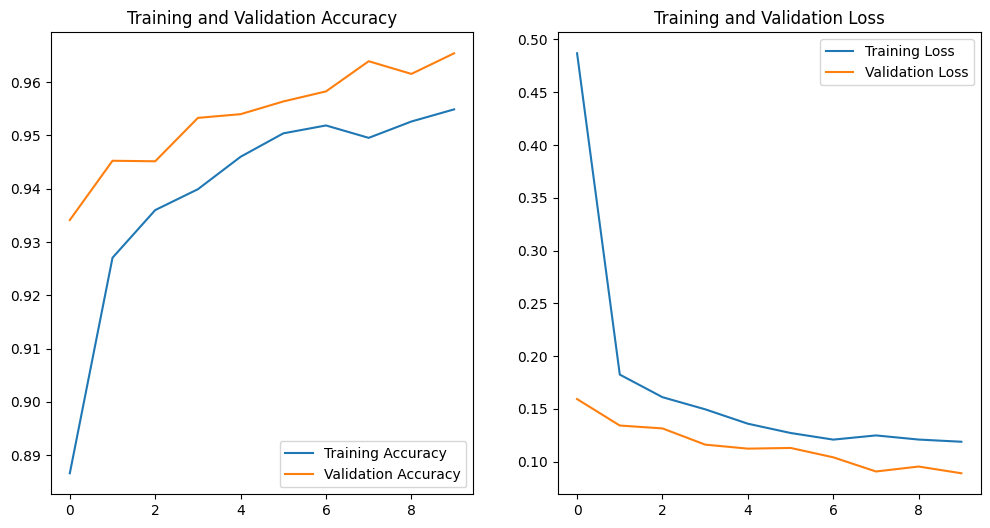

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(min(len(acc), len(val_acc)))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:len(epochs_range)], label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:len(epochs_range)], label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
mobilenet_model.save('fresee.h5')
print("Model saved as 'fresee.h5'")

Model saved as 'fresee.h5'


# Convert Model (optional)

convert model from .h5 to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format = keras fresee.h5 TFJS_Model

In [ ]:
!zip -r TFJS_Model.zip TFJS_Model

# Test Model

Saving Fresh-apple.webp to Fresh-apple.webp
Saving fresh-banana.jpg to fresh-banana.jpg
Saving fresh-cucumber.png to fresh-cucumber.png
Saving fresh-okra.jpg to fresh-okra.jpg
Saving Fresh-oranges.jpg to Fresh-oranges.jpg
Saving Fresh-potato.jpg to Fresh-potato.jpg
Saving fresh-potato1.jpg to fresh-potato1.jpg
Saving Fresh-Tomato.webp to Fresh-Tomato.webp
Saving jual-bibit-mangga-golek-india.width-800.format-webp.webp to jual-bibit-mangga-golek-india.width-800.format-webp.webp
Saving Rotten-apple.jpg to Rotten-apple.jpg
Saving Rotten-Banana.jpg to Rotten-Banana.jpg
Saving Rotten-Cucumber.webp to Rotten-Cucumber.webp
Saving rotten-okra.jpg to rotten-okra.jpg
Saving rotten-oranges.jpg to rotten-oranges.jpg
Saving Rotten-potato.jpg to Rotten-potato.jpg
Saving Rotten-Tomato.webp to Rotten-Tomato.webp
Saving rotten-tomato1.jpg to rotten-tomato1.jpg
Saving Screenshot_180-4237814159.webp to Screenshot_180-4237814159.webp
Saving test.jpg to test.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━

<ipython-input-23-038eb13bb1bc>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"


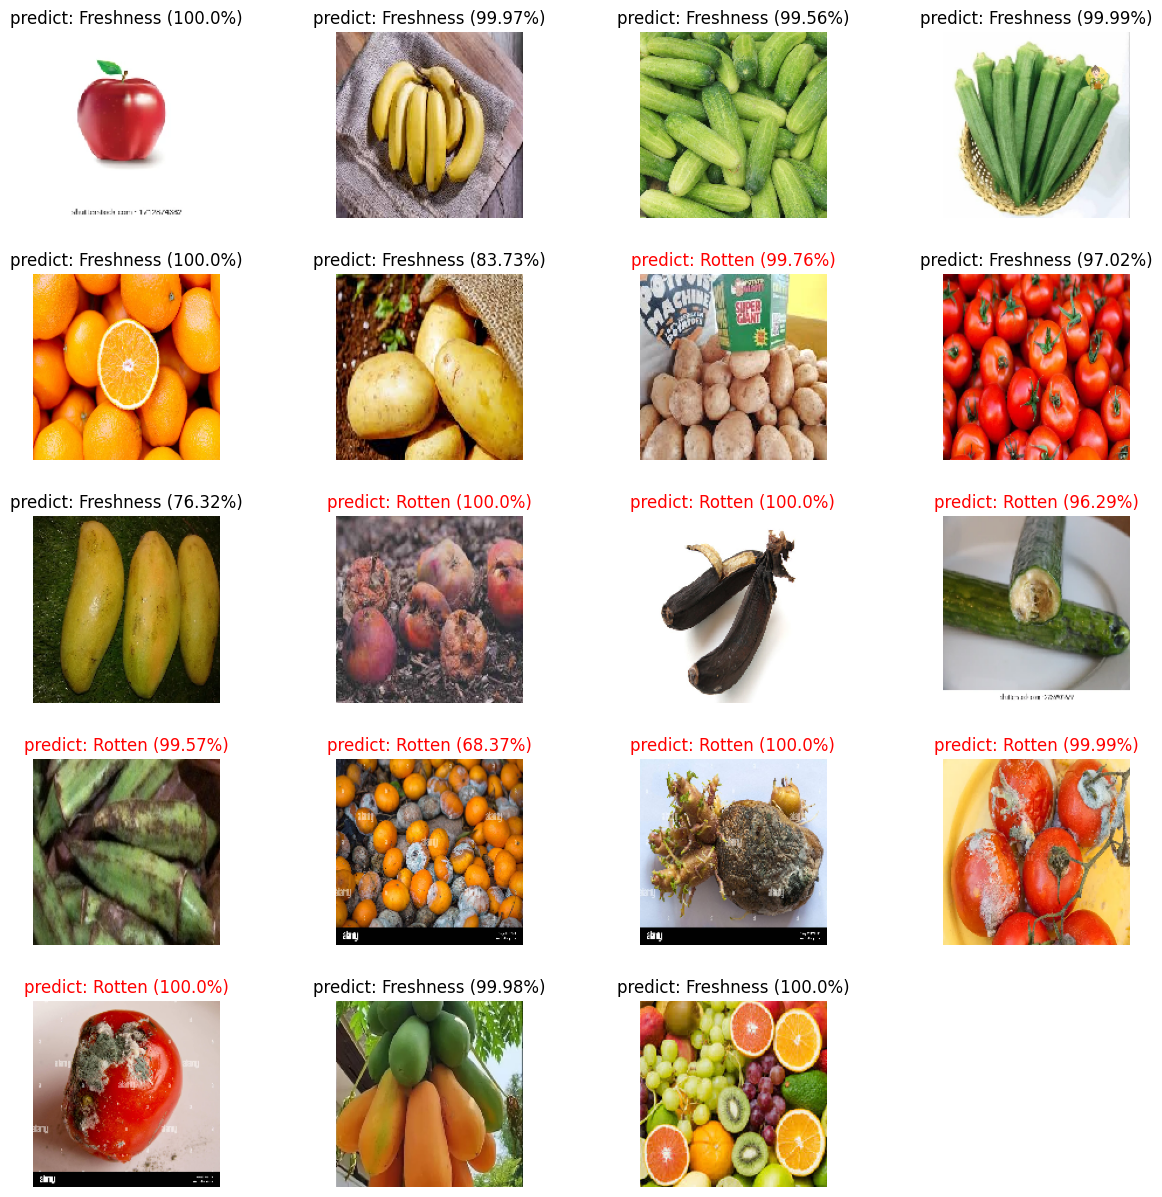

In [23]:
import cv2
import pathlib

from google.colab import files
from keras.utils import get_file
from keras.preprocessing import image

model_predict = tf.keras.models.load_model('fresee.h5')
model_predict.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode = "rgb", target_size = (160, 160), interpolation = "nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Freshness')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot(int(np.ceil(len(image_name)/4)), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(160, 160), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Freshness':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')